# <div align="center">Who is The NBA MVP of MVPs?</div>
<div align="center">By Zach Harrell</div>

***

### <div align="center">About me and why I chose this topic</div>

I have been watching and playing baskteball since I was in second grade. It started out as an obsession with college basketball in the mid to late 2000s. I followed the UNC vs Duke rivalry (my mom is a Duke alum and my dad is a UNC alum, rivalry games at our house were fun!) and eventualy transitioned into an NBA fan. Being a UNC fan from New Jersey I had zero sense of home town loyalty when I was picking the NBA team I would root for. After a quick scan of the leauge and players, and then trying each team out in 2K, I found the Milwaukee Bucks. At the time they had the backcourt duo of Monta Ellis and Brandon Jennings who perfectly fit my 2k playstyle and were more fun to watch then my hometown team(the then New Jersey Nets). 

### <div align="center">The Topic of this Analysis</div>

Being a Bucks fan for the last 10 years I wanted my analysis to be Bucks related, but I also wanted it to appeal to the larger NBA community. I decided to look into all leauge MVPs during my lifetime to find what I'll call **The MVP of MVPs**, or the player who had the *best* MVP season in the last 23 years. I will also need to come at this topic with a hypothesis to either prove or disprove; this is where my Bucks fandom reveals itself. I will be opperating under the Hypothesis that either of Giannis Antetokounmpo's MVP seasons make him the MVP of MVPs during my lifetime. 

##### $$ H \text{: Giannis Antetokounmpo is the MVP of the last 23 years of MVPs}$$
##### $$H_0 \text{: Giannis Antetokounmpo is not the MVP of the last 23 years of MVPs}$$

<table>
    <tr>
        <img src="https://nba.nbcsports.com/wp-content/uploads/sites/12/2019/04/gettyimages-1142713108-e1555295154644.jpg" alt="Giannas Dunk" width="500" height="600">
    </tr>
    <tr>
        <td>
            <img src="https://www.gannett-cdn.com/presto/2019/06/25/USAT/73e62a7e-f112-453b-858c-29c527c1bd94-2019-06-24_Giannis.jpg?crop=4096,3059,x425,y221" alt="Giannas MVP trophy" width="500" height="600">
        </td>
        <td>
            <img src="https://thedynastyguru.com/wp-content/uploads/2018/01/giannis-antetokounmpo-mean-mug.jpg" alt="Giannas" width="500" height="600">
        </td>
    </tr>
</table>

### <div align="center">Final assumptions and definitions</div>

I will be operating under the assumption that the MVP of MVPs is the best **statistical** player. Team record, standing, and playoff outcome are not accounted for in this analysis.

***

## Part 1: Data Gathering (Web Scraping)

Below are all of the python librarys that I will use to gather, store, and plot the data.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

First I needed to grab the season outcomes during my lifetime. 

I will be pulling all NBA data for this analysis from [basketball-reference](https://www.basketball-reference.com/) and its various different pages. This site is a great source for current and historical NBA data.

### Scraping Historic MVPs

In [2]:
base_url = 'https://www.basketball-reference.com/'

# this requests the HTML from the basketball-reference page for Season outcomes and award winners
r = requests.get(base_url+'leagues/')
soup = BeautifulSoup(r.content, 'html.parser')

# Here is where i separated the table from the rest of the HTML
table = soup.find('table')

# I needed to grab the column names to add into the dataframe
headers = [th.getText() for th in table.findAll('tr', limit=2)[1].findAll('th')]

# In these next few lines I am grabbing each year from the table rows and adding the data to a list
rows = table.findAll('tr')[2:]
# This line is to grab the value for the season
years = [[row.getText() for row in rows[i].findAll('th')] for i in range(len(rows))]

# This line grabbs the award winners for that season. 
# In this process I also attach any links I can find as tuples combined with the textual data for each row.
# scraping these links is important to gather additional information on each MVP winner by scraping 
#their personal player page.
winners = [[(row.getText(),row.find('a')) for row in rows[i].findAll('td')] for i in range(len(rows))]

# Now I need to merge the year and award winners lists in order to add them to a dataframe
row_data_links = []
row_data = []
for a,b in zip(years,winners) :
    row_data_links.append(a + b)
    #this list is removing the link information so the raw data can be added to a dataframe
    row_data.append(a+list(map(lambda x: x[0], b)))
    
# Here I am removing the first entry because the 2020-21 season has not completed yet 
# and I am also only grabbing the last 23 years of MVPS because I am 23 years old.
# For the purposes of this analysis I am only looking at MVPs during my lifetime.
row_data_links = row_data_links[1:23]
row_data = row_data[1:23]

# Here I am creating a dataframe with the scraped data
season_outcomes = pd.DataFrame(row_data, columns=headers)
season_outcomes

,Season,Lg,Champion,MVP,Rookie of the Year,Points,Rebounds,Assists,Win Shares
0,2019-20,NBA,Los Angeles Lakers,G. Antetokounmpo,J. Morant,J. Harden (2335),R. Gobert (916),L. James (684),J. Harden (13.1)
1,2018-19,NBA,Toronto Raptors,G. Antetokounmpo,L. Dončić,J. Harden (2818),A. Drummond (1232),R. Westbrook (784),J. Harden (15.2)
2,2017-18,NBA,Golden State Warriors,J. Harden,B. Simmons,L. James (2251),A. Drummond (1247),R. Westbrook (820),J. Harden (15.4)
3,2016-17,NBA,Golden State Warriors,R. Westbrook,M. Brogdon,R. Westbrook (2558),A. Drummond (1115),J. Harden (907),J. Harden (15.0)
4,2015-16,NBA,Cleveland Cavaliers,S. Curry,K. Towns,J. Harden (2376),A. Drummond (1198),R. Rondo (839),S. Curry (17.9)
5,2014-15,NBA,Golden State Warriors,S. Curry,A. Wiggins,J. Harden (2217),D. Jordan (1226),C. Paul (838),J. Harden (16.4)
6,2013-14,NBA,San Antonio Spurs,K. Durant,M. Carter-Williams,K. Durant (2593),D. Jordan (1114),J. Wall (721),K. Durant (19.2)
7,2012-13,NBA,Miami Heat,L. James,D. Lillard,K. Durant (2280),Ö. Aşık (956),G. Vásquez (704),L. James (19.3)
8,2011-12,NBA,Miami Heat,L. James,K. Irving,K. Durant (1850),D. Howard (785),S. Nash (664),L. James (14.5)
9,2010-11,NBA,Dallas Mavericks,D. Rose,B. Griffin,K. Durant (2161),K. Love (1112),S. Nash (855),L. James (15.6)


There is a lot of extra data I do not need ie: rookie of the year, points leader, etc. In the next line I only select the data I need from this dataframe.

In [3]:
mvps = season_outcomes[['Season','MVP']]

# The first few rows of the new dataframe look like this:
mvps.head()

,Season,MVP
0,2019-20,G. Antetokounmpo
1,2018-19,G. Antetokounmpo
2,2017-18,J. Harden
3,2016-17,R. Westbrook
4,2015-16,S. Curry


Now, I need to scrape each MVPs basketball-reference page to get the statistics for their MVP seasons.
To do this I'll iterate over the list of MVPs and follow the links I created earlier to pull the tables for each player using the same process as I did above.

In [4]:
#this line separates the links from the HTML anchor tags
row_data_links = list(map(lambda x: [x[0], x[3][0], x[3][1].get('href')], row_data_links))

#creating a list to store each MVP's stats
all_mvp_rows = []

#creating list for the column labels
labels = []

#Looping over each MVP
for mvp in row_data_links :
    
    # running a get request on each MVP's basketball-refrence page
    r = requests.get(base_url+mvp[2])
    
    #pulling the HTML from the request
    soup = BeautifulSoup(r.content, 'html.parser')
    
    # pulling the players stat table from the page
    table = soup.find('table')
    
    # writing the labels
    labels = [th.getText() for th in table.findAll('tr', limit=2)[0].findAll('th')]
    
    # grabbing each row of the table
    rows = table.findAll('tr')[1:]
    
    # grabbing the years for each season
    years = [[row.getText() for row in rows[i].findAll('th')] for i in range(len(rows))]
    
    # grabbing each seasons statistics
    stats = [[row.getText() for row in rows[i].findAll('td')] for i in range(len(rows))]
    
    # creating a list for this season
    winner_stats = []
    for a,b in zip(years,stats) :
        winner_stats.append(a + b)
    
    # This line will remove every year that the player did not win the MVP from their carrer statistics
    # This is made with the assumption that a player who wins MVP did not change teams during their MVP season.
    # I believe this assumption is safe for the time period that I am investigating
    winner_stats = list(filter(lambda x: x[0] == mvp[0], winner_stats))
    
    # If their MVP season was found I then add it to the list of other MVP seasons that were already pulled
    if len(winner_stats) > 0 :
        winner_stats = winner_stats[0]
        all_mvp_rows.append(winner_stats)
    else:
        all_mvp_rows.append([])

# Create the dataframe of MVP season statistics
mvp_stats = pd.DataFrame(all_mvp_rows, columns=labels)
# drop the leauge column because all MVPs during this time were from the NBA
mvp_stats = mvp_stats.drop(columns=['Lg'])


# After scraping from all MVP pages, we are left with a dataframe that looks like this
mvp_stats.head()

,Season,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019-20,25,MIL,PF,63,63,30.4,10.9,19.7,.553,...,.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5
1,2018-19,24,MIL,PF,72,72,32.8,10.0,17.3,.578,...,.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
2,2017-18,28,HOU,SG,72,72,35.4,9.0,20.1,.449,...,.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4
3,2016-17,28,OKC,PG,81,81,34.6,10.2,24.0,.425,...,.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
4,2015-16,27,GSW,PG,79,79,34.2,10.2,20.2,.504,...,.908,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1


In [5]:
# Here I am joining the two dataframes on the 'Season' column to connect the data
mvps_with_stats = mvps.join(mvp_stats.set_index('Season'), on='Season')
# This is now the first few rows of our MVP Dataframe
mvps_with_stats.head()

,Season,MVP,Age,Team,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019-20,G. Antetokounmpo,25,MIL,PF,63,63,30.4,10.9,19.7,...,.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5
1,2018-19,G. Antetokounmpo,24,MIL,PF,72,72,32.8,10.0,17.3,...,.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
2,2017-18,J. Harden,28,HOU,SG,72,72,35.4,9.0,20.1,...,.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4
3,2016-17,R. Westbrook,28,OKC,PG,81,81,34.6,10.2,24.0,...,.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
4,2015-16,S. Curry,27,GSW,PG,79,79,34.2,10.2,20.2,...,.908,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1


### Scraping Historic player stats

I will also need the season statistics for each player in the NBA during each NBA season. This will be to normalize for differences in play style over eras. For example, it is true that scoring in the NBA has increased over time(I will prove this later during the data visualization portion) and in some cases I will need to normalize statistics for era. The process of gathering this data will be almost identical to the previous table scrapes so I will only mention the new steps to avoid repeating the same description of the data accumulation process.

In [6]:
# I am storing each dataframe as a key-value pair
# with the key being the year of the season and the value being the dataframe
leauge_stats = {}
labels = []
# Looping over the years of this analysis 1998 - 2020
# in python the range function is non inclusive of the upper bound so the years selected are 1998 - 2020
for year in range(1998, 2021) :
    # Luckily basketball-reference has a standardized url for each NBA season.
    # This will streamline the scraping process
    r = requests.get(base_url+'leagues/NBA_{}_per_game.html'.format(year))
    soup = BeautifulSoup(r.content, 'html.parser')
    table = soup.find('table')
    labels = [th.getText() for th in table.findAll('tr', limit=2)[0].findAll('th')]
    
    # The leauge stats page on basketball-reference has a rank value for sorting players,
    # I do not need this column so i drop it here
    labels.pop(0)
    rows = table.findAll('tr')[1:]
    stats = [[row.getText() for row in rows[i].findAll('td')] for i in range(len(rows))]
    
    # Creating the year key to associate with the data frame,
    # This will match the 'Season' variable from the MVP stats table previously created
    key = str(year) + '-' + str(year + 1)[2:]
    leauge_stats[key] = pd.DataFrame(stats, columns=labels)
    
# This is an example of the data just pulled from the 2018-19 season
leauge_stats['2018-19'].head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,.356,...,.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,.629,...,.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,.512,...,.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,.401,...,.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


## Part 2: Cleaning the Data 

The scraped data came from basketball-reference in string format. To run any analysis on the statistics we need to convert these strings into numeric objects. The next few lines will performe this data conversion on the MVP and leauge stats dataframes.

In [7]:
# These lines grab the statistical column names and removes any non-numeric columns
columns = list(mvps_with_stats.columns)[2:]
columns.pop(1)
columns.pop(1)

# Here I convert all the relevent columns to numeric data
for c in columns :
    mvps_with_stats[c] = pd.to_numeric(mvps_with_stats[c], errors='coerce')
    for season in leauge_stats.keys() :
        leauge_stats[season][c] = pd.to_numeric(leauge_stats[season][c], errors='coerce')

I will also need to create new data columns to compare the MVPs to eachother

In [8]:
no_context = mvps_with_stats.copy(deep=True)

# This group of lines calculates the average for each statistic amung MVPs
ave_pts = no_context['PTS'].mean()
ave_asists = no_context['AST'].mean()
ave_oReb = no_context['ORB'].mean()
ave_stl = no_context['STL'].mean()
ave_blk = no_context['BLK'].mean()
ave_dReb = no_context['DRB'].mean()
ave_fg = no_context['FG%'].mean()
ave_ft = no_context['FT%'].mean()
ave_3p = no_context['3P%'].mean()
ave_efg = no_context['eFG%'].mean()

# This group of lines is creating the Lists where each MVPs deviation will be stored
points_dist = []
assist_dist = []
OReb_dist = []
steal_dist = []
block_dist = []
DReb_dist = []
ft_dist = []
efg_dist = []

# This is calculating each MVP's deviation from each statistic
for idx, player in no_context.iterrows() :
    points_dist.append(player['PTS'] - ave_pts)
    assist_dist.append(player['AST'] - ave_asists)
    OReb_dist.append(player['ORB'] - ave_oReb)
    steal_dist.append(player['STL'] - ave_stl)
    block_dist.append(player['BLK'] - ave_blk)
    DReb_dist.append(player['DRB'] - ave_dReb)
    ft_dist.append(player['FT%'] - ave_ft)
    efg_dist.append(player['eFG%'] - ave_efg)


# And Finally these lines are adding the deviations to the Dataframe
no_context['deviatoin from mvp PTS average'] = points_dist
no_context['deviation from mvp AST average'] = assist_dist
no_context['deviation from mvp ORB avarage'] = OReb_dist
no_context['deviatoin from mvp STL average'] = steal_dist
no_context['deviation from mvp BLK average'] = block_dist
no_context['deviation from mvp DRB avarage'] = DReb_dist
no_context['deviation from mvp FT% average'] = ft_dist
no_context['deviation from mvp eFG% average'] = efg_dist

## Part 3: Visual data representation and Analysis

First we will look at MVP statistics without context. Meaning we will only be comparing them to eachother, not their era. We will compare each stat by finding the average for that statistic across all of our MVPs and then subtracting the average from each MVP's value in that statistic. This will give us a number above zero corresponding to how far over the average the MVP is and below zero for how far below the average the MVP is in terms of other MVPs.

To help visualize the data I will first create bar charts for what I believe to be the 3 aspects of the game(Offense, Defense, and Efficiency). This will show where each MVP stands in terms of distance from the average for these three catagories.

##### NOTE: the order of the following graphs horizontaly is most recent MVP(left) to the oldest MVP(right)

### Offensive Stats

The three offensive statistics that we will look at are Points per game, Asists per game and Offensive Rebounds per game.

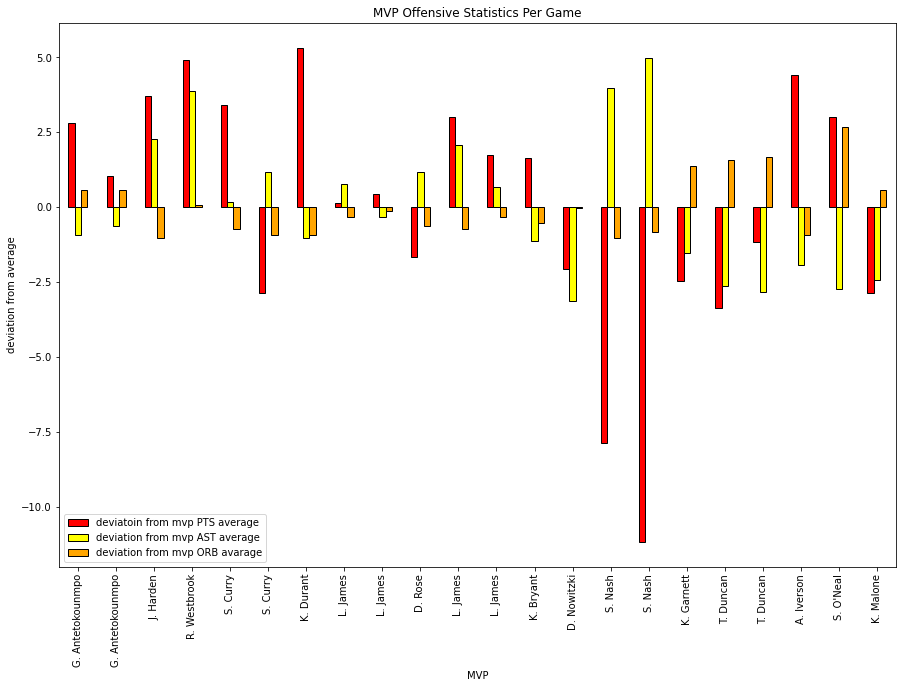

In [9]:
off = no_context.copy(deep=True)
offense_plot = off.plot(x='MVP', y=['deviatoin from mvp PTS average','deviation from mvp AST average','deviation from mvp ORB avarage'],color=['red','yellow','orange'], kind='bar',edgecolor="black",figsize=(15,10))
plt.xticks(rotation='vertical')
plt.ylabel("deviation from average")
plt.title('MVP Offensive Statistics Per Game')
plt.show()

### Defensive Statistics

The three defensive Statistics that we will look at are Steals per game, Blocks per game, and Deffensive Rebounds per game.

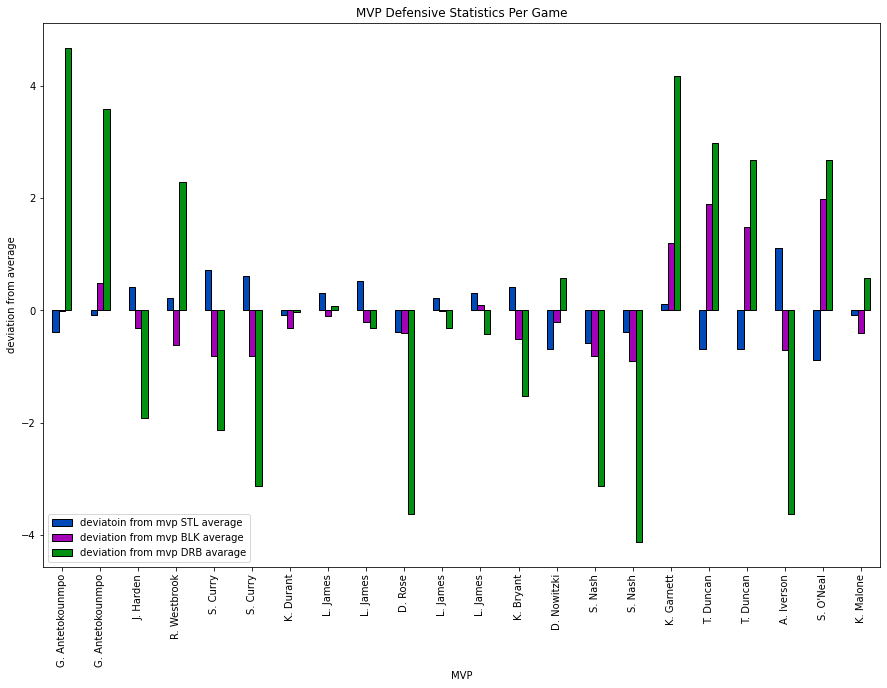

In [10]:
defense = no_context.copy(deep=True)
defense_plot = defense.plot(x='MVP', y=['deviatoin from mvp STL average','deviation from mvp BLK average','deviation from mvp DRB avarage'],color=['#0049b8','#a300b8','#009111'], kind='bar',edgecolor="black",figsize=(15,10))
plt.xticks(rotation='vertical')
plt.ylabel("deviation from average")
plt.title('MVP Defensive Statistics Per Game')
plt.show()

### Efficiancy Statistics

Since efficiancy is closely related to scoring I have to justify puting both in defferent catagories. Below is a scatter plot over our targeted time period of Effective field goal percentage vs Points per game.

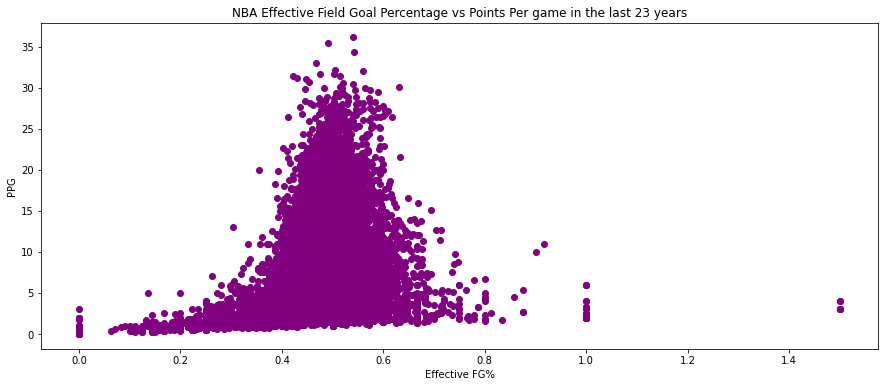

In [11]:
e_fg = []
ppg = []
for k in leauge_stats.keys():
    temp = leauge_stats[k].copy(deep=True)
    temp = temp.loc[temp['FGA'] >= 1]
    e_fg.extend(temp['eFG%'])
    ppg.extend(temp['PTS'])

plt.figure(figsize=(15,6))
plt.scatter(e_fg, ppg, color='purple')
plt.title("NBA Effective Field Goal Percentage vs Points Per game in the last 23 years")
plt.xlabel("Effective FG%")
plt.ylabel("PPG")
plt.show()

This graph shows us that the most efficient players are not always the ones who score the most. In fact most of the NBA fits in between around a 30% and a 65% effective field goal percentage.

Effective Field goal percentage (eFG%) is an interesting statistic, [it is calculated](https://www.breakthroughbasketball.com/stats/effective-field-goal-percentage.html/) by taking into account the difficulty and the point differential of taking 2 point field goals vs 3 point field goals. Because of this it would be redundant to also look at those two stats because they are factored into the eFG%.

To visualize efficiancy I will graph both the eFG% and Freethrow Percentage to score each MVP's efficiency.

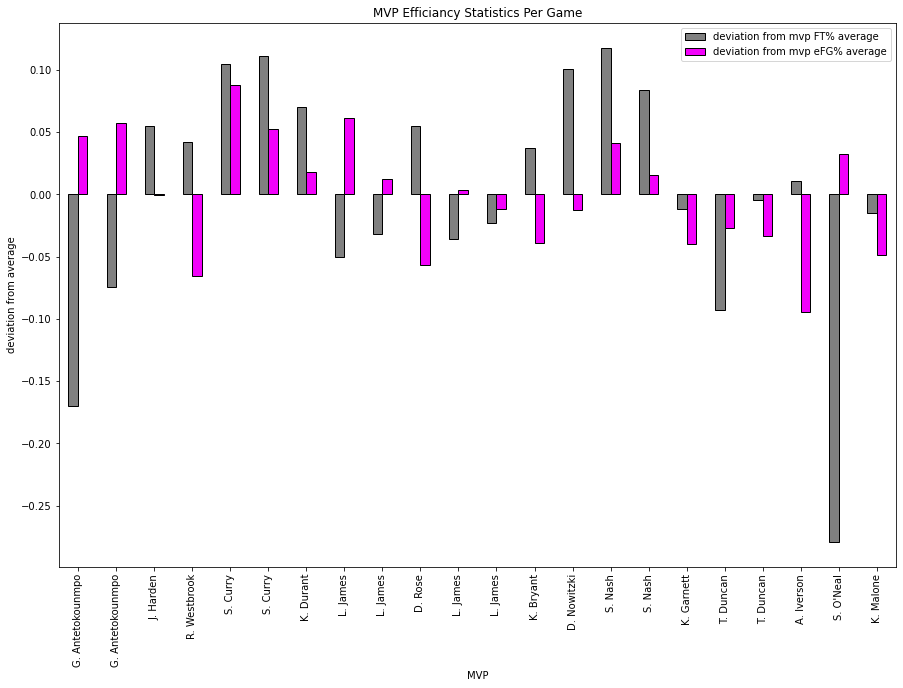

In [12]:
efficiancy = no_context.copy(deep=True)
efficiant_plot = efficiancy.plot(x='MVP', y=['deviation from mvp FT% average', 'deviation from mvp eFG% average'],color=['gray','#f202fa'], kind='bar',edgecolor="black",figsize=(15,10))
plt.xticks(rotation='vertical')
plt.ylabel("deviation from average")
plt.title('MVP Efficiancy Statistics Per Game')
plt.show()

### What do these graphs show?

In each graph we can see some trends based off of position. The guard positions(PG and SG) tend to get more asists and steals and the Forward positions(SF, PF) and the Centers tend to get more Blocks and rebounds. We will need to normalize for these positional differences in the statistics.

As promised I will now explain my previous claim that NBA statistics have changed over time. Below I will graph a stat from each aspect of the game discussed previoulsy. The time period will again be over the last 23 years. Based on the graphs we can decide if there has been a change in the way the game has been played over time.

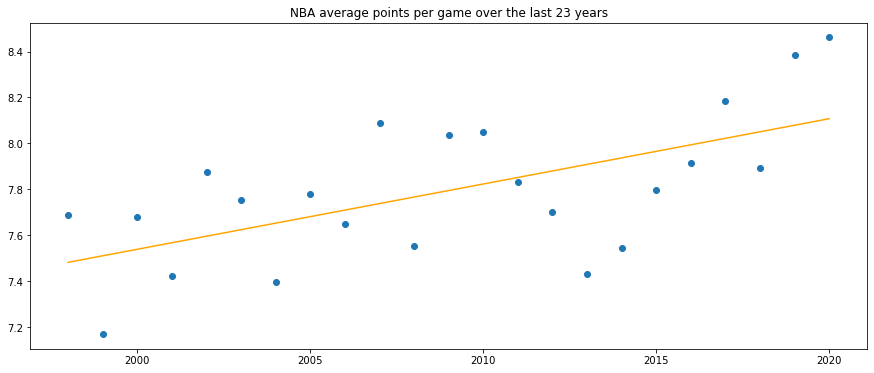

In [13]:
# Here I am creating the lists to store the data
ave_points = []
ave_3p = []
ave_efg = []
ave_blk = []
years = []

# Pulling the data from each season
for year in range(1998, 2021) :
    key = str(year) + '-' + str(year + 1)[2:]
    ave_points.append(leauge_stats[key]['PTS'].mean())
    ave_3p.append(leauge_stats[key]['3P%'].mean())
    ave_efg.append(leauge_stats[key]['eFG%'].mean())
    ave_blk.append(leauge_stats[key]['BLK'].mean())
    years.append(year)
    
# Graphing years vs average points per game
x = np.array(years)
y = np.array(ave_points)
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(15,6))
plt.scatter(years, ave_points)
plt.plot(x, m*x + b, color='orange')
plt.title("NBA average points per game over the last 23 years")
plt.show()

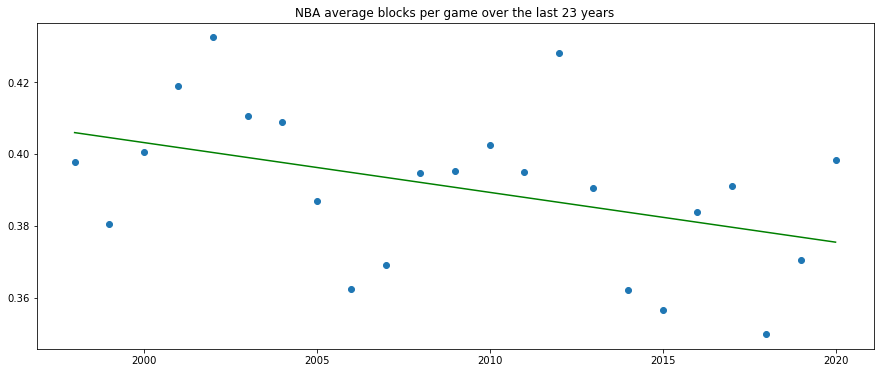

In [14]:
# Graphing years vs Average Blocks per game
plt.figure(figsize=(15,6))
plt.scatter(years, ave_blk)
y = np.array(ave_blk)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='green')
plt.title("NBA average blocks per game over the last 23 years")
plt.show()

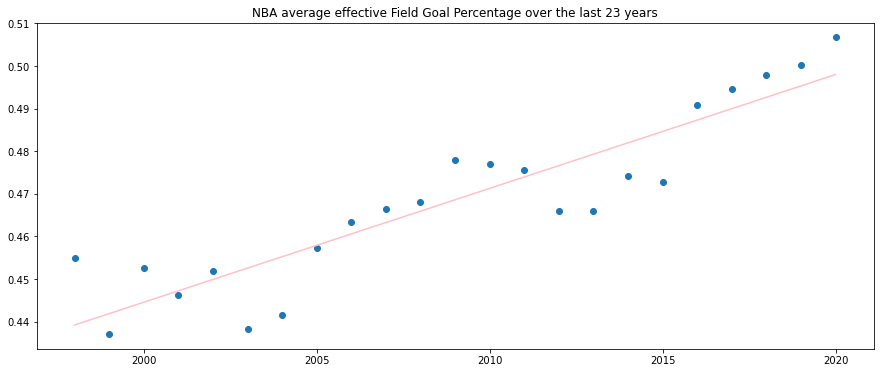

In [15]:
# Graphing years vs Average eFG%
plt.figure(figsize=(15,6))
plt.scatter(years, ave_efg)
y = np.array(ave_efg)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='pink')
plt.title("NBA average effective Field Goal Percentage over the last 23 years")
plt.show()

Looking at these graphs it becomes clear that there is a positve relationship between the PPG and Year and the eFG% and year. There is also a slight negative relationship between blocks and year. Whether it was because of rule changes or because of a change in play style these yearly differences have to be accounted for.

### Providing Context to the Data

Because of the conclusions arrived at from the previous graphs, we need to normalize the data to minimze the amount of variables present in the analysis. The two variables we identified were player position and time period. To adjust the data to minimize the effect of these variables I will look at each MVP season and calculate the average of each statistic for other players in their position during that year.

In [16]:
# I will need a new Dataframe to hold the contextual data
with_context = mvps_with_stats.copy(deep=True)

# We need to store the data for each season
pos_ave_pts = []
pos_ave_asists = []
pos_ave_oReb = []
pos_ave_stl = []
pos_ave_blk = []
pos_ave_dReb = []
pos_ave_ft = []
pos_ave_efg = []

# Calculating each MVP's deviation from their positional average during their season
for idx, mvp in with_context.iterrows() :
    pos_and_year = leauge_stats[mvp['Season']].copy(deep=True)
    
    # Here we limit the observed data to players that match the MVP's listed position
    pos_and_year = pos_and_year.loc[pos_and_year['Pos'] == mvp['Pos']]
    
    # This group of lines calculates the deviations and adds them to the lists created earlier
    pos_ave_pts.append(mvp['PTS'] - pos_and_year['PTS'].mean())
    pos_ave_asists.append(mvp['AST'] - pos_and_year['AST'].mean())
    pos_ave_oReb.append(mvp['ORB'] - pos_and_year['ORB'].mean())
    pos_ave_stl.append(mvp['STL'] - pos_and_year['STL'].mean())
    pos_ave_blk.append(mvp['BLK'] - pos_and_year['BLK'].mean())
    pos_ave_dReb.append(mvp['DRB'] - pos_and_year['DRB'].mean())
    pos_ave_ft.append(mvp['FT%'] - pos_and_year['FT%'].mean())
    pos_ave_efg.append(mvp['eFG%'] - pos_and_year['eFG%'].mean())

# Adding the contextual data to the dataframe
with_context['pos_diff_pts'] = pos_ave_pts
with_context['pos_diff_asists'] = pos_ave_asists
with_context['pos_diff_oReb'] = pos_ave_oReb
with_context['pos_diff_stl'] = pos_ave_stl
with_context['pos_diff_blk'] = pos_ave_blk
with_context['pos_diff_dReb'] = pos_ave_dReb
with_context['pos_diff_ft%'] = pos_ave_ft
with_context['pos_diff_efg%'] = pos_ave_efg

Now that we have the contextual statistics for each MVP we can create the same three graphs with our new data. This process is the exact same as the first data cleaning process except now using our contextual data instead of the pure MVP stats.

In [17]:
# calculating the averages for the contextual statistics
ave_pts_diff = with_context['pos_diff_pts'].mean()
ave_asists_diff = with_context['pos_diff_asists'].mean()
ave_oReb_diff = with_context['pos_diff_oReb'].mean()
ave_stl_diff = with_context['pos_diff_stl'].mean()
ave_blk_diff = with_context['pos_diff_blk'].mean()
ave_dReb_diff = with_context['pos_diff_dReb'].mean()
ave_ft_diff = with_context['pos_diff_ft%'].mean()
ave_efg_diff = with_context['pos_diff_efg%'].mean()

points_dist = []
assist_dist = []
OReb_dist = []
steal_dist = []
block_dist = []
DReb_dist = []
fg_dist = []
ft_dist = []
p3_dist = []
efg_dist = []

# this loop calculates the deviation from the contextual averages
for idx, player in with_context.iterrows() :
    points_dist.append(player['pos_diff_pts'] - ave_pts_diff)
    assist_dist.append(player['pos_diff_asists'] - ave_asists_diff)
    OReb_dist.append(player['pos_diff_oReb'] - ave_oReb_diff)
    steal_dist.append(player['pos_diff_stl'] - ave_stl_diff)
    block_dist.append(player['pos_diff_blk'] - ave_blk_diff)
    DReb_dist.append(player['pos_diff_dReb'] - ave_dReb_diff)
    ft_dist.append(player['pos_diff_ft%'] - ave_ft_diff)
    efg_dist.append(player['pos_diff_efg%'] - ave_efg_diff)


# adding the contextual deviations to the dataframe
with_context['pts deviation context'] = points_dist
with_context['ast deviation context'] = assist_dist
with_context['orb deviation context'] = OReb_dist
with_context['stl deviation context'] = steal_dist
with_context['blk deviation context'] = block_dist
with_context['drb deviation context'] = DReb_dist
with_context['ft% deviation context'] = ft_dist
with_context['efg% deviation context'] = efg_dist

# We no longer need most of the gathered statistics so I remove the uneeded columns here
needed_columns = [
    'Season',
    'MVP',
    'pts deviation context',
    'ast deviation context',
    'orb deviation context',
    'stl deviation context',
    'blk deviation context',
    'drb deviation context',
    'ft% deviation context',
    'efg% deviation context'
]
with_context = with_context[needed_columns]

##### NOTE: like before the graphs are sorted horizontaly by the MVP season, with left being most recent and right being the oldest MVP season

### Offensive Stats With Context

Like before we are looking at Points per game, Asists per game, and Offensive Rebounds per game

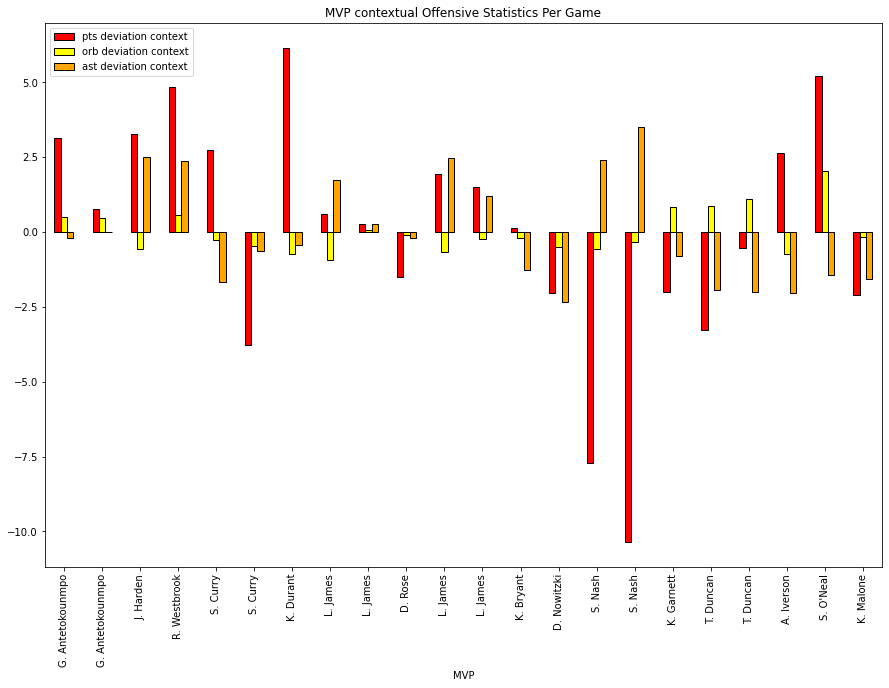

In [18]:
context_off = with_context.copy(deep=True)
off_con_plot = context_off.plot(x='MVP', y=['pts deviation context', 'orb deviation context', 'ast deviation context'],color=['red','yellow','orange'],kind='bar',edgecolor="black",figsize=(15,10))
plt.xticks(rotation='vertical')
plt.title('MVP contextual Offensive Statistics Per Game')
plt.show()

### Deffensive Statistics With Context

Like before we are looking at Steals per game, Blocks per game, and Deffensive Rebounds per game

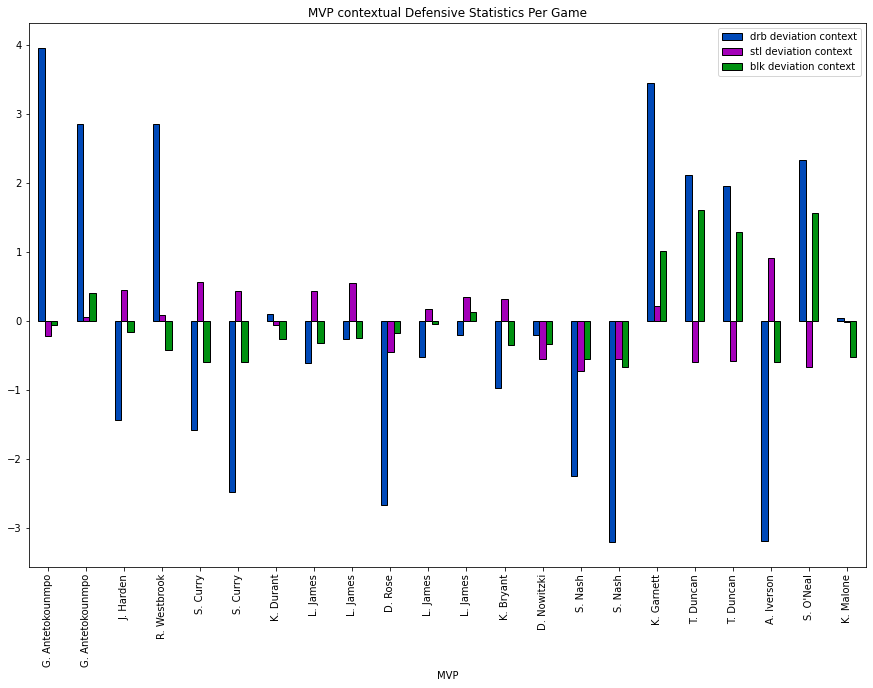

In [19]:
context_deffense = with_context.copy(deep=True)
def_con_plot = context_deffense.plot(x='MVP', y=['drb deviation context','stl deviation context', 'blk deviation context'],color=['#0049b8','#a300b8','#009111'], kind='bar',edgecolor="black",figsize=(15,10))
plt.xticks(rotation='vertical')
plt.title('MVP contextual Defensive Statistics Per Game')
plt.show()

### Efficiancy Statistics With Context

Like before we are looking at eFG% and Freethrow Percentage

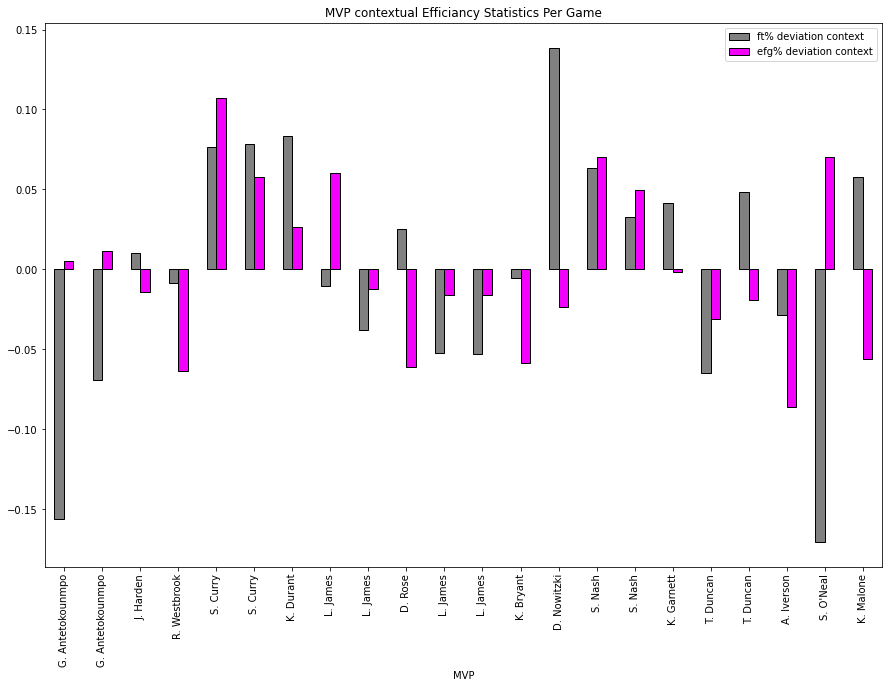

In [20]:
context_efficiancy = with_context.copy(deep=True)
eff_con_plot = context_efficiancy.plot(x='MVP', y=['ft% deviation context','efg% deviation context'],color=['gray','#f202fa'], kind='bar',edgecolor="black",figsize=(15,10))
plt.xticks(rotation='vertical')
plt.title('MVP contextual Efficiancy Statistics Per Game')
plt.show()

Now that we have accounted for those external variables we can now score the MVPs in each aspect of the game. To do that I will score each player for each of the three catagories. The scores will range from 1 to 22 in terms of the MVP's standing in each catagory. After scoring each catagory I will add all three scores together to get an MVP Score. 

The player who has the highest MVP score will be crowned the statistical MVP of my lifetime.

In [21]:
ranks = with_context.copy(deep=True)

# Creating scores for the offensive stats
ranks['PTS_score'] = ranks['pts deviation context'].rank(ascending=True)
ranks['ORB_score'] = ranks['orb deviation context'].rank(ascending=True)
ranks['AST_score'] = ranks['ast deviation context'].rank(ascending=True)

# Creating the offesnsive score
ranks['OFF_temp'] = ranks.apply(lambda row: row['PTS_score'] + row['ORB_score'] + row['AST_score'], axis=1)
ranks['OFF_score'] = ranks['OFF_temp'].rank(ascending=True)

# Creating scores for the deffensive stats
ranks['STL_score'] = ranks['stl deviation context'].rank(ascending=True)
ranks['DRB_score'] = ranks['drb deviation context'].rank(ascending=True)
ranks['BLK_score'] = ranks['blk deviation context'].rank(ascending=True)

# Creating the Defensive score
ranks['DEF_temp'] = ranks.apply(lambda row: row['STL_score'] + row['DRB_score'] + row['BLK_score'], axis=1)
ranks['DEF_score'] = ranks['DEF_temp'].rank(ascending=True)

# Creating the scores for the Efficiency stats
ranks['eFG_score'] = ranks['efg% deviation context'].rank(ascending=True)
ranks['FT_score'] = ranks['ft% deviation context'].rank(ascending=True)

# Creating the Efficiency score
ranks['EFF_temp'] = ranks.apply(lambda row: row['eFG_score'] + row['FT_score'], axis=1)
ranks['EFF_score'] = ranks['EFF_temp'].rank(ascending=True)

# Removing un-needed columns from the dataframe
ranks = ranks[['Season', 'MVP', 'OFF_score','DEF_score','EFF_score']]

Now that I have scored every MVP during the time period I can graph their scores for each aspect of the game to get an idea of how they rank visually

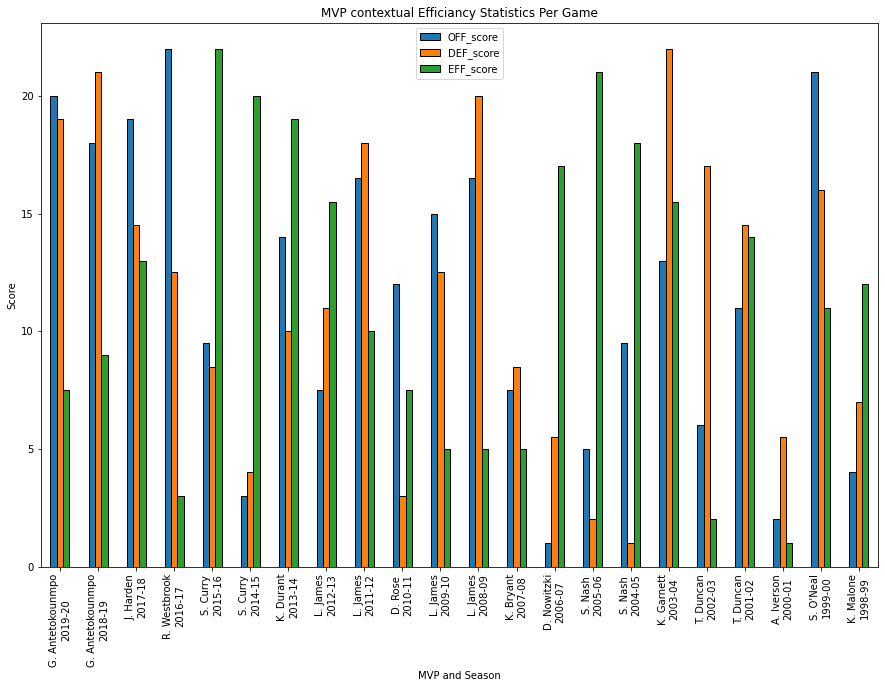

In [22]:
ranks['MVP and Season'] = ranks.apply(lambda row: row['MVP'] + '\n'+ row['Season'], axis=1)
ranks.plot(x='MVP and Season',y=['OFF_score','DEF_score','EFF_score'],kind='bar',edgecolor="black",figsize=(15,10))
plt.xticks(rotation='vertical')
plt.ylabel('Score')
plt.title('MVP contextual Efficiancy Statistics Per Game')
plt.show()

Looking at the graph it becomes clear that there are some MVPs that dominate certian aspects of the game. I will highlight a few players from each catagory to get a sense of how the final rankings may look.

###### Efficiancy:
- Steph Curry (both MVP seasons)
- Kevin Durant
- Steve Nash (2005-06)

###### Offense:
- Giannis Antetokounmpo (2019-20)
- Russell Westbrook
- Shaquille O'Neal

###### Defense:
- Giannis Antetokounmpo (2018-19)
- Lebron James (2008-09)
- Kevin Garnett


###### All around:
The following players stand out to me as being solid in all three catagories.
- James Harden
- Kevin Garnett
- Tim Duncan

Now I will calculate the final MVP score and compare the results to my initial hypothesis:

##### $$ H \text{: Giannis Antetokounmpo is the MVP of the last 23 years of MVPs}$$
##### $$H_0 \text{: Giannis Antetokounmpo is not the MVP of the last 23 years of MVPs}$$

## Part 4: Final Conclusions

In [23]:
# Calculating the MVP score and ranking the MVPs
ranks['MVP_score'] = ranks.apply(lambda row: row['OFF_score'] + row['DEF_score'] + row['EFF_score'], axis=1)
ranks['MVP_RANK'] = ranks['MVP_score'].rank(ascending=False)

# Sorting the datafrome by MVP Score
final_standings = ranks[['Season', 'MVP', 'OFF_score','DEF_score','EFF_score', 'MVP_score', 'MVP_RANK']].sort_values(by='MVP_RANK',ignore_index=True)
final_standings

,Season,MVP,OFF_score,DEF_score,EFF_score,MVP_score,MVP_RANK
0,2003-04,K. Garnett,13.0,22.0,15.5,50.5,1.0
1,2018-19,G. Antetokounmpo,18.0,21.0,9.0,48.0,2.5
2,1999-00,S. O'Neal,21.0,16.0,11.0,48.0,2.5
3,2019-20,G. Antetokounmpo,20.0,19.0,7.5,46.5,4.5
4,2017-18,J. Harden,19.0,14.5,13.0,46.5,4.5
5,2011-12,L. James,16.5,18.0,10.0,44.5,6.0
6,2013-14,K. Durant,14.0,10.0,19.0,43.0,7.0
7,2008-09,L. James,16.5,20.0,5.0,41.5,8.0
8,2015-16,S. Curry,9.5,8.5,22.0,40.0,9.0
9,2001-02,T. Duncan,11.0,14.5,14.0,39.5,10.0


##### Outcome
The MVP that scored the highest with my metrics over the last 23 years was Kevin Garnett from the 2003-04 season. He edged out both Giannis Antetokunmpo from the 20118-19 season and Shaquille O'Neal from the 1999-00 season by 2.5 points in the MVP score metric. 

##### Surprises
It is very interesiting that there was a tie for second after comparing three diffierent statistical catagories. I am also surprised that Both of Giannis's MVP seasons rank in the top 5, I made my hypothesis based off of being a Bucks fan, not off of my predicted outcome. As the analysis was moving forward I was starting to believe my hypothesis could have been correct.

##### Hypothesis
Unfortunatly I cannot reject the Null hypothesis. Therefore I have to conclude that Giannis Antetokounmpo is not the MVP of MVPs during my lifetime.

##### Final Thoughts
This comparison was done to explore a topic that I have a lot of interest in. The process was made me dive deeper into the NBA and basketball then I had before(I even learned what Effective Field Goal percentage was and how it is calculated). With all that being said, Every player on the MVP list is one of the best NBA players of all time and it is always fun comparing the best with eachoter. I hope this analysis was able to accuratly and coherently convey its message.

## Step 5: Handing out Awards

<table>
    <tr>
        <img src="kg_first.png" alt="KG" width="500" height="600">
    </tr>
    <tr>
        <td>
            <img src="giannis_2.png" alt="Giannis" width="500" height="600">
        </td>
        <td>
            <img src="shaq_2.png" alt="shaq" width="500" height="600">
        </td>
    </tr>
</table>